### Import Libraries

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Loading the Data Set

In [2]:
data_raw = pd.read_csv('../dataset/train_data.csv', sep='\t')
data = data_raw.copy()
pd.options.display.max_columns = 150

data.drop(data.columns[50:107], axis=1, inplace=True)
data.drop(data.columns[51:], axis=1, inplace=True)

print('Number of participants: ', len(data))
data.head()

Number of participants:  1015341


,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,EST1,EST2,EST3,EST4,EST5,EST6,EST7,EST8,EST9,EST10,AGR1,AGR2,AGR3,AGR4,AGR5,AGR6,AGR7,AGR8,AGR9,AGR10,CSN1,CSN2,CSN3,CSN4,CSN5,CSN6,CSN7,CSN8,CSN9,CSN10,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10,country
0,4.0,1.0,5.0,2.0,5.0,1.0,5.0,2.0,4.0,1.0,1.0,4.0,4.0,2.0,2.0,2.0,2.0,2.0,3.0,2.0,2.0,5.0,2.0,4.0,2.0,3.0,2.0,4.0,3.0,4.0,3.0,4.0,3.0,2.0,2.0,4.0,4.0,2.0,4.0,4.0,5.0,1.0,4.0,1.0,4.0,1.0,5.0,3.0,4.0,5.0,GB
1,3.0,5.0,3.0,4.0,3.0,3.0,2.0,5.0,1.0,5.0,2.0,3.0,4.0,1.0,3.0,1.0,2.0,1.0,3.0,1.0,1.0,4.0,1.0,5.0,1.0,5.0,3.0,4.0,5.0,3.0,3.0,2.0,5.0,3.0,3.0,1.0,3.0,3.0,5.0,3.0,1.0,2.0,4.0,2.0,3.0,1.0,4.0,2.0,5.0,3.0,MY
2,2.0,3.0,4.0,4.0,3.0,2.0,1.0,3.0,2.0,5.0,4.0,4.0,4.0,2.0,2.0,2.0,2.0,2.0,1.0,3.0,1.0,4.0,1.0,4.0,2.0,4.0,1.0,4.0,4.0,3.0,4.0,2.0,2.0,2.0,3.0,3.0,4.0,2.0,4.0,2.0,5.0,1.0,2.0,1.0,4.0,2.0,5.0,3.0,4.0,4.0,GB
3,2.0,2.0,2.0,3.0,4.0,2.0,2.0,4.0,1.0,4.0,3.0,3.0,3.0,2.0,3.0,2.0,2.0,2.0,4.0,3.0,2.0,4.0,3.0,4.0,2.0,4.0,2.0,4.0,3.0,4.0,2.0,4.0,4.0,4.0,1.0,2.0,2.0,3.0,1.0,4.0,4.0,2.0,5.0,2.0,3.0,1.0,4.0,4.0,3.0,3.0,GB
4,3.0,3.0,3.0,3.0,5.0,3.0,3.0,5.0,3.0,4.0,1.0,5.0,5.0,3.0,1.0,1.0,1.0,1.0,3.0,2.0,1.0,5.0,1.0,5.0,1.0,3.0,1.0,5.0,5.0,3.0,5.0,1.0,5.0,1.0,3.0,1.0,5.0,1.0,5.0,5.0,5.0,1.0,5.0,1.0,5.0,1.0,5.0,3.0,5.0,5.0,KE


### Cleaning the Data Set

In [3]:
print('Is there any missing value? \n ', data.isnull().values.any())
print('How many missing values? \n ', data.isnull().values.sum())
data.dropna(inplace=True)
print('Number of participants after eliminating missing values? \n ', len(data))

Is there any missing value? 
  True
How many missing values? 
  89227
Number of participants after eliminating missing values? 
  1013481


#### Groups and Questions

In [4]:

ext_questions = {'EXT1' : 'I am the life of the party',
                 'EXT2' : 'I dont talk a lot',
                 'EXT3' : 'I feel comfortable around people',
                 'EXT4' : 'I keep in the background',
                 'EXT5' : 'I start conversations',
                 'EXT6' : 'I have little to say',
                 'EXT7' : 'I talk to a lot of different people at parties',
                 'EXT8' : 'I dont like to draw attention to myself',
                 'EXT9' : 'I dont mind being the center of attention',
                 'EXT10': 'I am quiet around strangers'}

est_questions = {'EST1' : 'I get stressed out easily',
                 'EST2' : 'I am relaxed most of the time',
                 'EST3' : 'I worry about things',
                 'EST4' : 'I seldom feel blue',
                 'EST5' : 'I am easily disturbed',
                 'EST6' : 'I get upset easily',
                 'EST7' : 'I change my mood a lot',
                 'EST8' : 'I have frequent mood swings',
                 'EST9' : 'I get irritated easily',
                 'EST10': 'I often feel blue'}

agr_questions = {'AGR1' : 'I feel little concern for others',
                 'AGR2' : 'I am interested in people',
                 'AGR3' : 'I insult people',
                 'AGR4' : 'I sympathize with others feelings',
                 'AGR5' : 'I am not interested in other peoples problems',
                 'AGR6' : 'I have a soft heart',
                 'AGR7' : 'I am not really interested in others',
                 'AGR8' : 'I take time out for others',
                 'AGR9' : 'I feel others emotions',
                 'AGR10': 'I make people feel at ease'}

csn_questions = {'CSN1' : 'I am always prepared',
                 'CSN2' : 'I leave my belongings around',
                 'CSN3' : 'I pay attention to details',
                 'CSN4' : 'I make a mess of things',
                 'CSN5' : 'I get chores done right away',
                 'CSN6' : 'I often forget to put things back in their proper place',
                 'CSN7' : 'I like order',
                 'CSN8' : 'I shirk my duties',
                 'CSN9' : 'I follow a schedule',
                 'CSN10' : 'I am exacting in my work'}

opn_questions = {'OPN1' : 'I have a rich vocabulary',
                 'OPN2' : 'I have difficulty understanding abstract ideas',
                 'OPN3' : 'I have a vivid imagination',
                 'OPN4' : 'I am not interested in abstract ideas',
                 'OPN5' : 'I have excellent ideas',
                 'OPN6' : 'I do not have a good imagination',
                 'OPN7' : 'I am quick to understand things',
                 'OPN8' : 'I use difficult words',
                 'OPN9' : 'I spend time reflecting on things',
                 'OPN10': 'I am full of ideas'}

#### Group Names and Columns

In [5]:

EXT = [column for column in data if column.startswith('EXT')]
EST = [column for column in data if column.startswith('EST')]
AGR = [column for column in data if column.startswith('AGR')]
CSN = [column for column in data if column.startswith('CSN')]
OPN = [column for column in data if column.startswith('OPN')]

### Visualize the questions and answers distribution data

In [6]:
def vis_questions(groupname, questions, color):
    plt.figure(figsize=(40,60))
    for i in range(1, 11):
        plt.subplot(10,5,i)
        plt.hist(data[groupname[i-1]], bins=14, color= color, alpha=.5)
        plt.title(questions[groupname[i-1]], fontsize=18)

#### Q&A Distribution related to Extroversion Personality

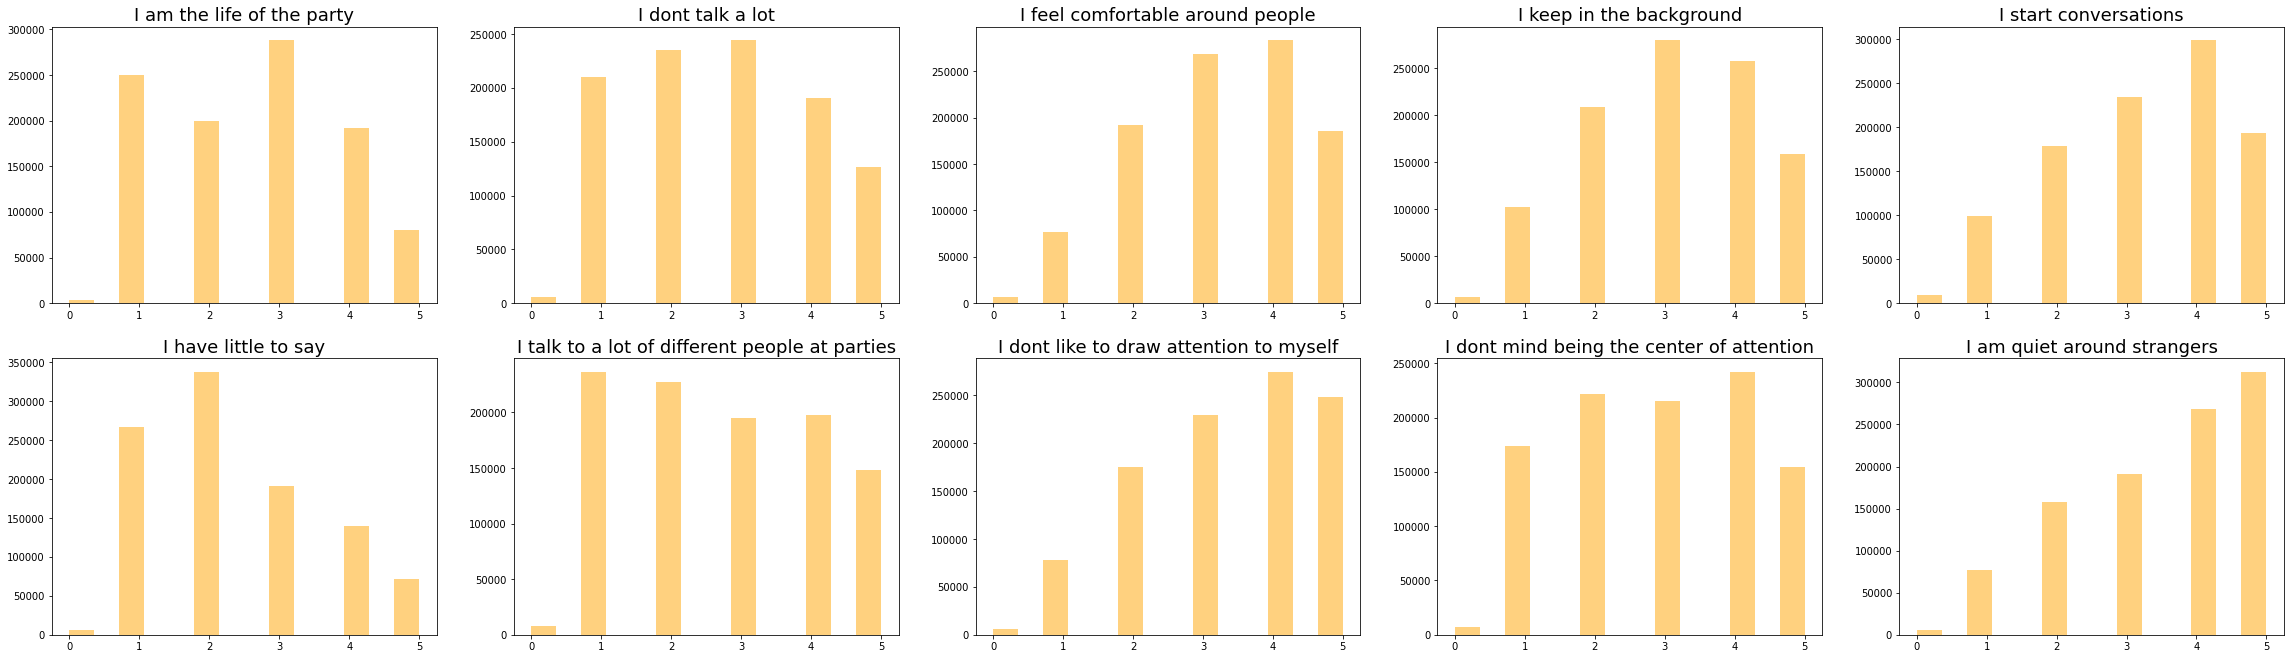

In [7]:
vis_questions(EXT, ext_questions, 'orange')

#### Q&A Distribution related to Neuroticism Personality

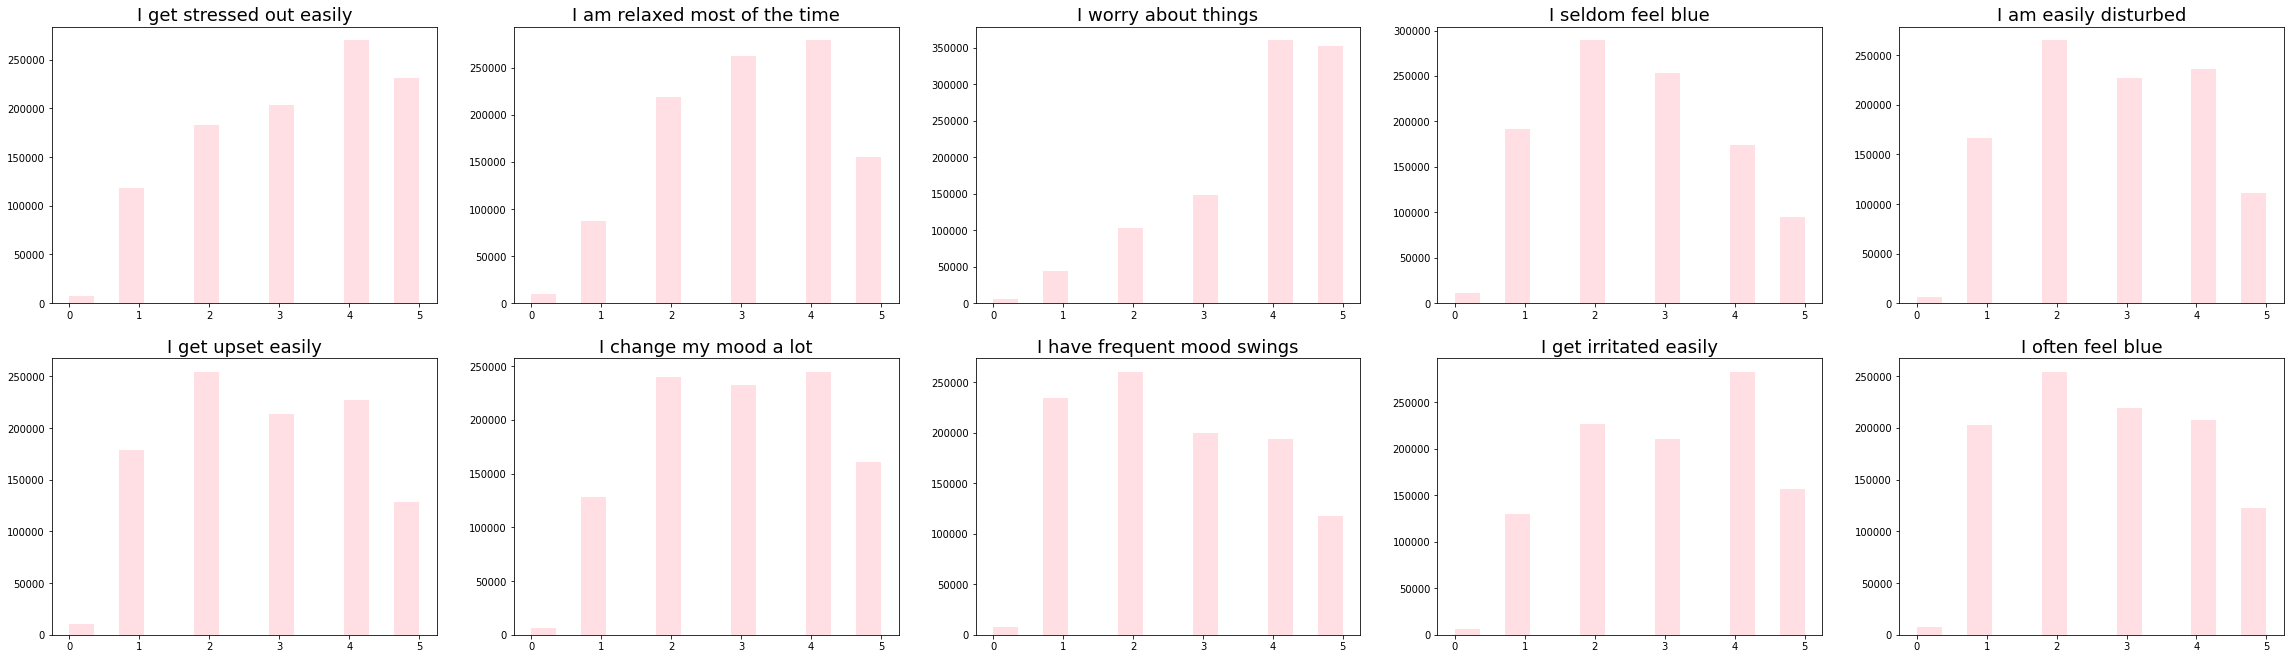

In [8]:
vis_questions(EST, est_questions, 'pink')

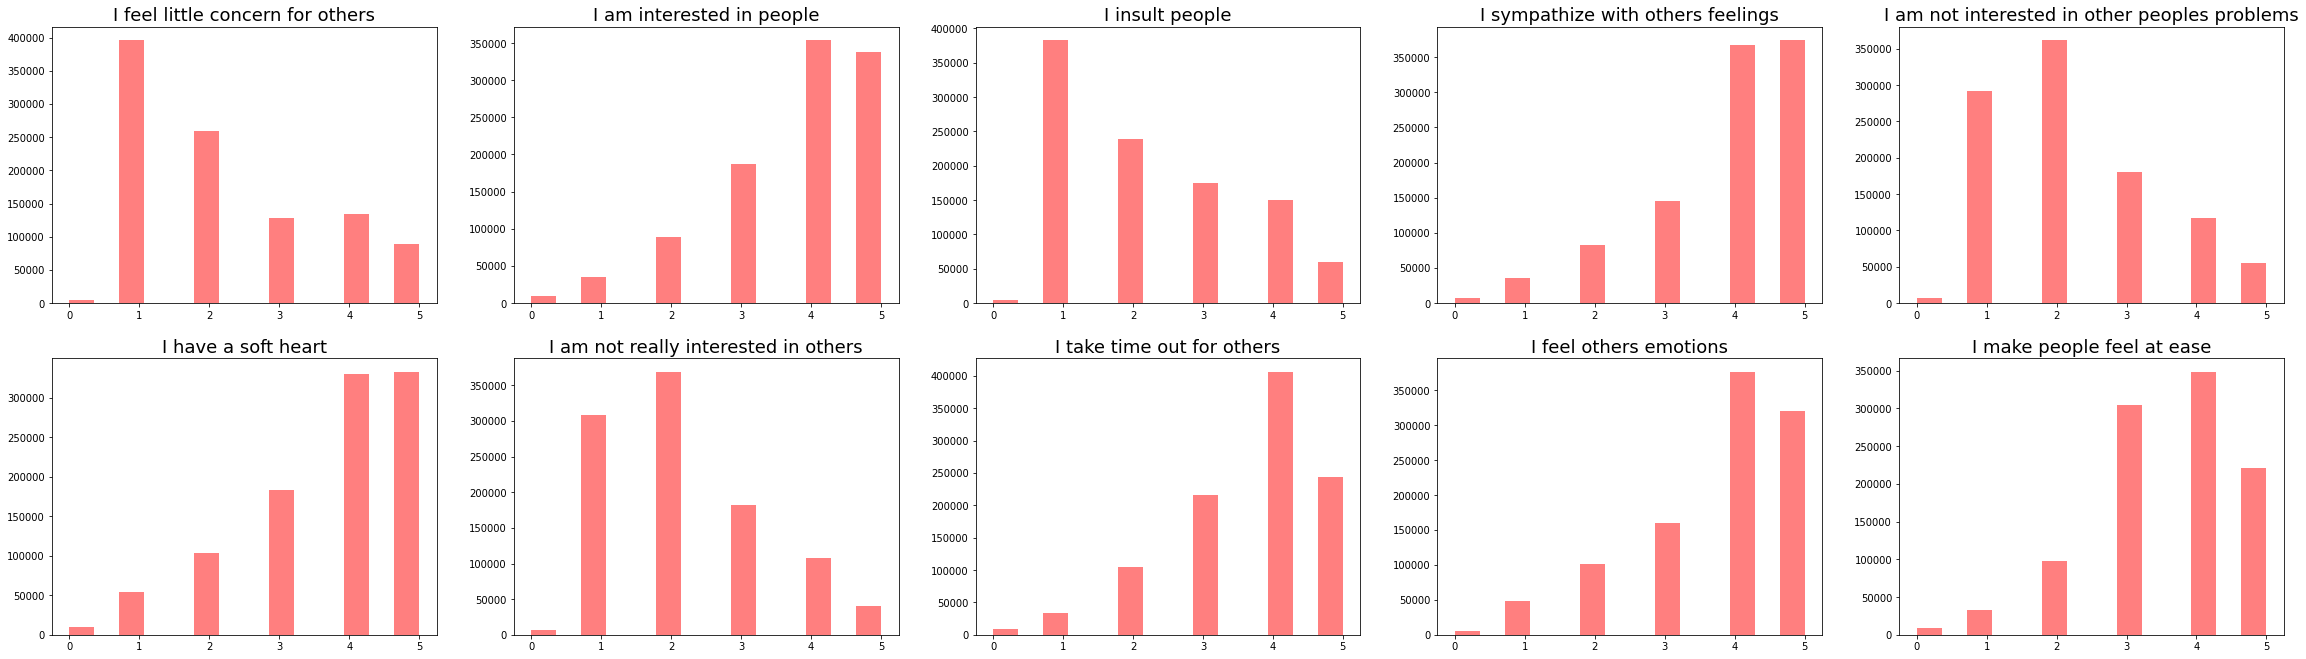

In [9]:
vis_questions(AGR, agr_questions, 'red')

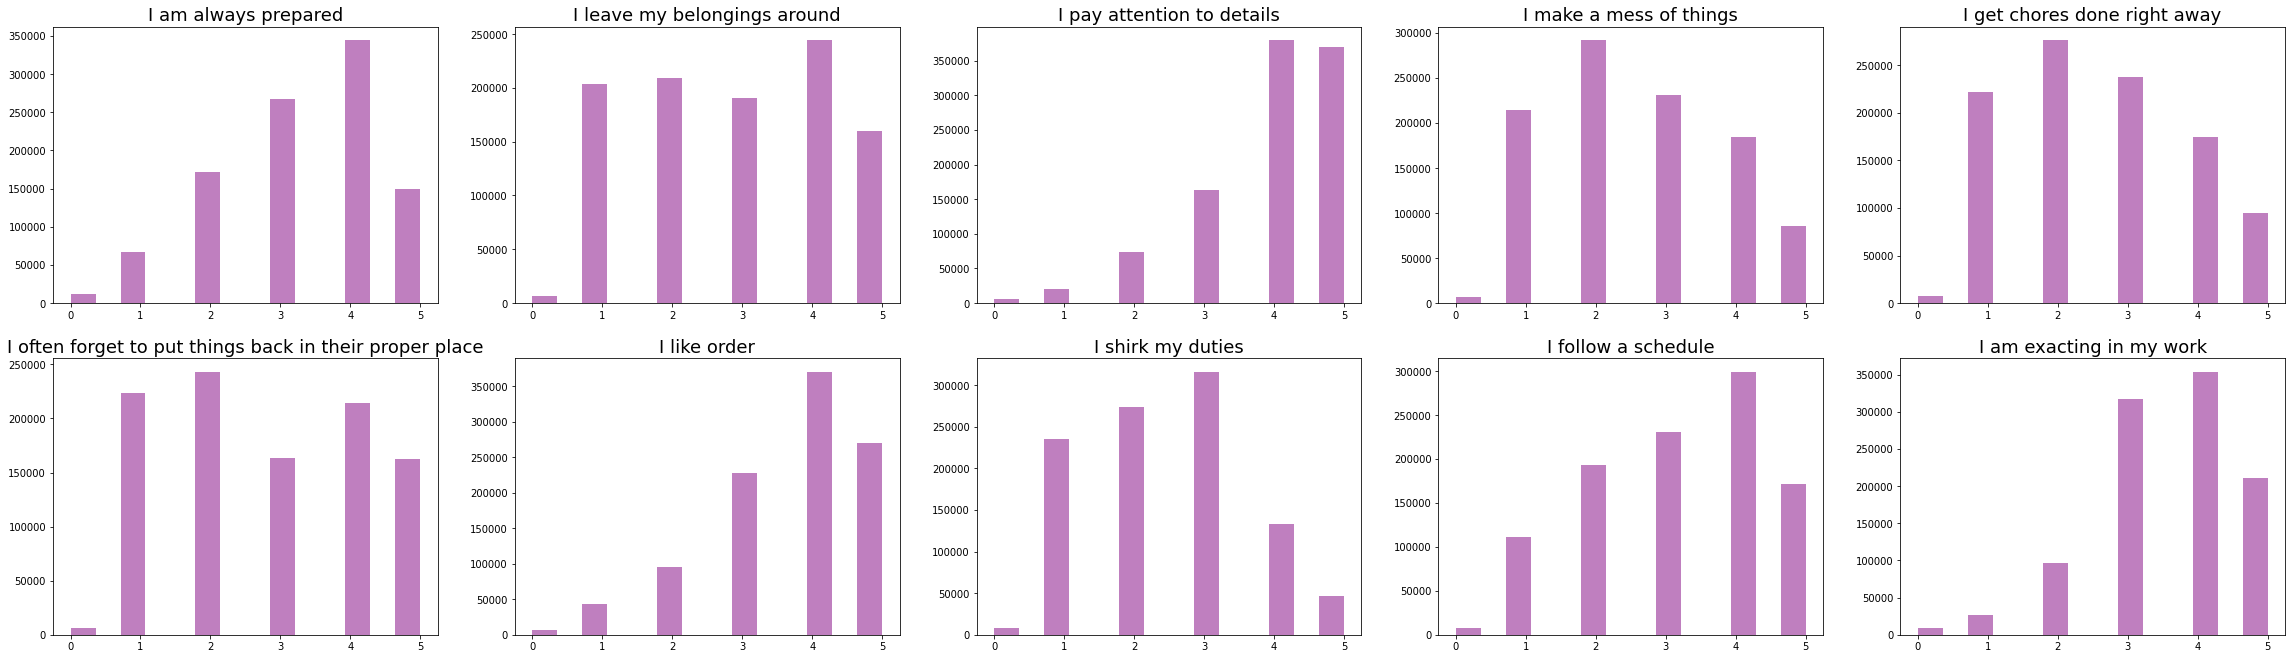

In [10]:
vis_questions(CSN, csn_questions, 'purple')

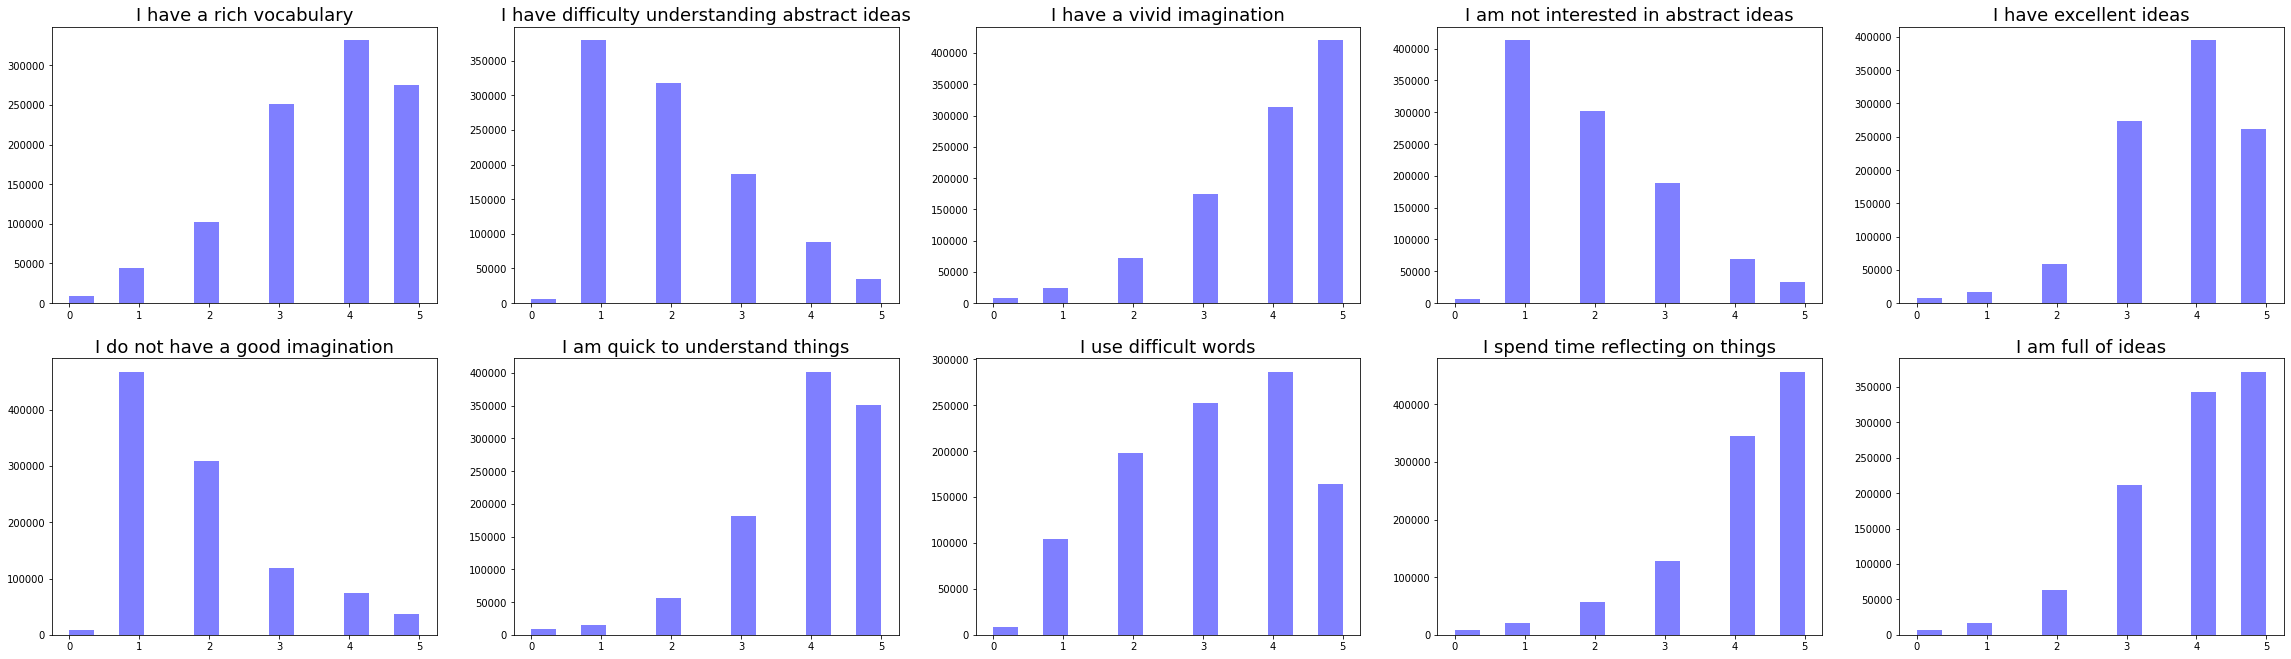

In [11]:
vis_questions(OPN, opn_questions, 'blue')

### Defining Clustering

In [12]:
from sklearn.preprocessing import MinMaxScaler

df = data.drop('country', axis=1)
columns = list(df.columns)

scaler = MinMaxScaler(feature_range=(0,1))
df = scaler.fit_transform(df)
df = pd.DataFrame(df, columns=columns)
df_sample = df[:5000]

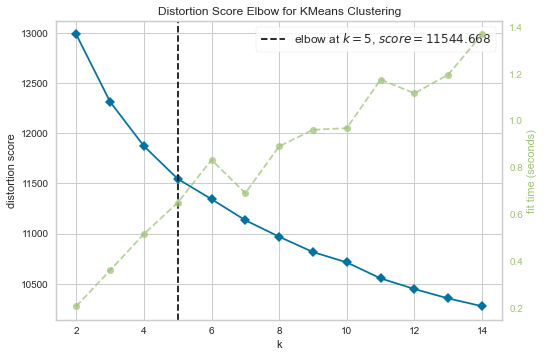

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [13]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

kmeans = KMeans()
visualizer = KElbowVisualizer(kmeans, k=(2,15))
visualizer.fit(df_sample)
visualizer.poof()

##### Results are showing that 5 clusters looks optimum for the data set and we already working on OCEAN model of 5 different personalities traits.

### Train the Model

In [14]:
from sklearn.cluster import KMeans

df_model = data.drop('country', axis=1)

kmeans = KMeans(n_clusters=5)
k_fit = kmeans.fit(df_model)

In [15]:

pd.options.display.max_columns = 10
predictions = k_fit.labels_
df_model['Clusters'] = predictions
df_model.head()

,EXT1,EXT2,EXT3,EXT4,EXT5,...,OPN7,OPN8,OPN9,OPN10,Clusters
0,4.0,1.0,5.0,2.0,5.0,...,5.0,3.0,4.0,5.0,2
1,3.0,5.0,3.0,4.0,3.0,...,4.0,2.0,5.0,3.0,0
2,2.0,3.0,4.0,4.0,3.0,...,5.0,3.0,4.0,4.0,0
3,2.0,2.0,2.0,3.0,4.0,...,4.0,4.0,3.0,3.0,3
4,3.0,3.0,3.0,3.0,5.0,...,5.0,3.0,5.0,5.0,2


#### Results of the Model and Predictions

##### How many individual do we have for each cluster?

In [16]:
df_model.Clusters.value_counts()

4    226509
0    212509
2    210023
1    199814
3    164626
Name: Clusters, dtype: int64

##### Grouping results into clusters

In [17]:
pd.options.display.max_columns = 150
df_model.groupby('Clusters').mean()

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,EST1,EST2,EST3,EST4,EST5,EST6,EST7,EST8,EST9,EST10,AGR1,AGR2,AGR3,AGR4,AGR5,AGR6,AGR7,AGR8,AGR9,AGR10,CSN1,CSN2,CSN3,CSN4,CSN5,CSN6,CSN7,CSN8,CSN9,CSN10,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10
Clusters,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,2.123256,3.304425,3.087366,3.665111,2.955945,2.708234,2.203130,4.001958,2.324542,4.136521,3.517268,3.070585,4.161955,2.600426,2.831094,2.802672,2.882890,2.445426,2.986297,2.721706,1.885567,3.935598,1.695251,4.352827,1.987972,4.146841,2.017867,3.981267,4.175720,3.717937,3.833541,2.232428,4.298251,2.026578,3.235835,2.080124,4.165245,2.020569,3.831588,3.891190,3.575453,2.139491,3.897383,2.063122,3.727113,1.966547,4.008743,2.987436,4.267744,3.815090
1,1.814653,3.620957,2.234793,4.049981,2.288944,3.189131,1.748992,4.062954,2.183626,4.470873,4.249707,2.459718,4.503398,2.145941,3.559555,3.861211,3.992733,3.763565,4.007842,3.933103,2.499730,3.334836,2.609272,3.805804,2.583918,3.823526,2.739673,3.409015,3.647252,3.047224,2.798718,3.365745,3.809433,3.484921,2.085680,3.510995,3.554441,3.050512,2.770747,3.304698,3.501617,2.382085,4.064960,2.136477,3.434354,2.086160,3.677435,3.180583,4.275716,3.724809
2,3.464506,1.951891,4.335006,2.225923,4.258776,1.670841,3.878247,2.816139,3.735648,2.522200,2.317584,3.823462,3.152021,3.285612,2.110355,1.895278,2.104550,1.671607,2.111293,1.715969,1.893983,4.429048,1.826314,4.246273,1.858187,3.846074,1.589840,4.097061,4.098723,4.193684,3.720692,2.571085,4.194807,1.890488,3.145422,2.271942,3.873957,1.931074,3.585141,3.877061,3.883922,1.754098,4.080106,1.795513,4.157330,1.655214,4.314794,3.232341,4.096209,4.293335
3,2.183513,3.293295,2.789687,3.409389,2.580510,2.767509,2.113658,3.530870,2.642608,3.792183,2.344873,3.619592,2.992115,2.919442,2.322695,2.013181,2.301356,1.921896,2.580941,2.245818,3.026490,2.928134,2.572637,2.772515,3.151270,2.648282,3.004100,2.848949,2.601418,2.976055,3.144412,2.829286,3.667428,2.408471,2.369954,2.739889,3.378926,2.512519,2.771002,3.339108,3.534126,1.978302,3.613093,2.059164,3.620680,2.044221,3.883967,3.108531,3.698146,3.665004
4,3.456392,1.910039,3.798379,2.498890,4.045605,1.828515,3.659806,2.762870,3.769351,2.993245,3.800719,2.935115,4.235761,2.417546,3.279909,3.456145,3.797668,3.445735,3.648266,3.163155,2.161164,4.272802,2.656424,4.179737,2.002759,3.993457,1.857260,3.895783,4.127730,3.845706,2.955675,3.607362,3.838757,3.234406,2.234238,3.523864,3.455836,2.827278,2.944002,3.477902,3.738849,2.115633,4.246149,1.966531,3.958112,1.771435,3.963088,3.374506,4.186019,4.201758


##### Sum up the each question groups

In [18]:
col_list = list(df_model)
ext = col_list[0:10]
est = col_list[10:20]
agr = col_list[20:30]
csn = col_list[30:40]
opn = col_list[40:50]

data_sums = pd.DataFrame()
data_sums['extroversion'] = df_model[ext].sum(axis=1)/10
data_sums['neurotic'] = df_model[est].sum(axis=1)/10
data_sums['agreeable'] = df_model[agr].sum(axis=1)/10
data_sums['conscientious'] = df_model[csn].sum(axis=1)/10
data_sums['open'] = df_model[opn].sum(axis=1)/10
data_sums['clusters'] = predictions
data_sums.groupby('clusters').mean()

,extroversion,neurotic,agreeable,conscientious,open
clusters,,,,,
0,3.051049,3.002032,3.189685,3.161535,3.244812
1,2.966490,3.647677,3.150025,3.173589,3.246420
2,3.085918,2.418773,3.207919,3.106167,3.326286
3,2.910322,2.526191,2.852985,2.916100,3.120523
4,3.072309,3.418002,3.299282,3.209932,3.352208


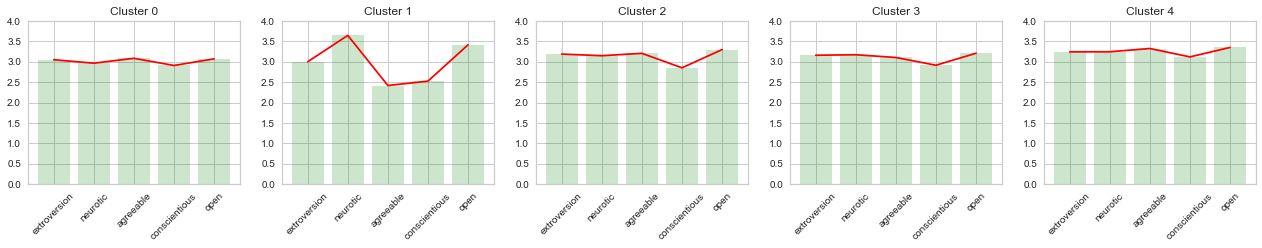

In [19]:

dataclusters = data_sums.groupby('clusters').mean()
plt.figure(figsize=(22,3))
for i in range(0, 5):
    plt.subplot(1,5,i+1)
    plt.bar(dataclusters.columns, dataclusters.iloc[:, i], color='green', alpha=0.2)
    plt.plot(dataclusters.columns, dataclusters.iloc[:, i], color='red')
    plt.title('Cluster ' + str(i))
    plt.xticks(rotation=45)
    plt.ylim(0,4);

### Visualizing the Cluster Predictions

In [20]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_fit = pca.fit_transform(df_model)

df_pca = pd.DataFrame(data=pca_fit, columns=['PCA1', 'PCA2'])
df_pca['Clusters'] = predictions
df_pca.head()

,PCA1,PCA2,Clusters
0,-5.558179,-1.431644,2
1,0.800418,3.933024,0
2,-0.179573,2.847548,0
3,0.925258,-0.370309,3
4,-4.353068,3.504441,2


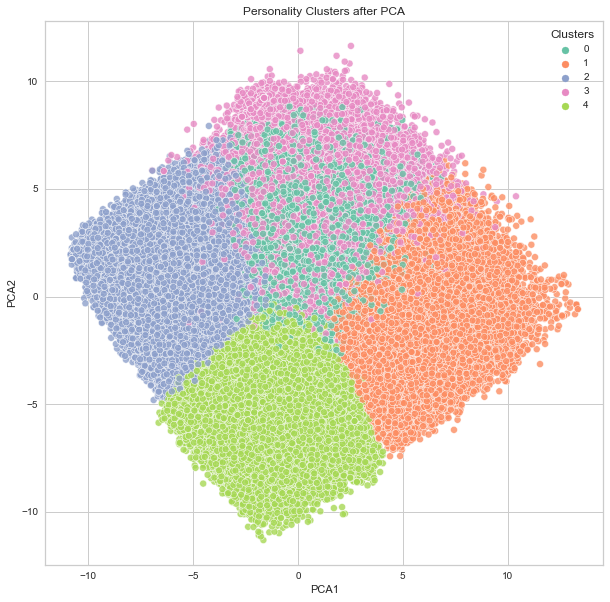

In [21]:
plt.figure(figsize=(10,10))
sns.scatterplot(data=df_pca, x='PCA1', y='PCA2', hue='Clusters', palette='Set2', alpha=0.8)
plt.title('Personality Clusters after PCA');

### Save the Model

In [26]:
import pickle

Pkl_Filename = "Pickle_RL_Model.pkl"  

with open(Pkl_Filename, 'wb') as file:  
    pickle.dump(k_fit, file)

### Testing the Model

In [22]:
my_data = pd.read_excel('../dataset/test_data.xlsx')
my_data

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,EST1,EST2,EST3,EST4,EST5,EST6,EST7,EST8,EST9,EST10,AGR1,AGR2,AGR3,AGR4,AGR5,AGR6,AGR7,AGR8,AGR9,AGR10,CSN1,CSN2,CSN3,CSN4,CSN5,CSN6,CSN7,CSN8,CSN9,CSN10,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10
0,2,3,3,2,2,5,2,4,5,4,2,3,4,5,2,2,1,1,3,1,2,5,1,5,2,5,1,3,5,5,5,1,4,1,4,1,5,2,5,5,3,2,4,2,5,1,5,2,5,5


In [23]:
my_personality = k_fit.predict(my_data)
print('My Personality Cluster: ', my_personality)

My Personality Cluster:  [0]


#### Sum of question groups

In [24]:
# Summing up the my question groups
col_list = list(my_data)
ext = col_list[0:10]
est = col_list[10:20]
agr = col_list[20:30]
csn = col_list[30:40]
opn = col_list[40:50]

my_sums = pd.DataFrame()
my_sums['extroversion'] = my_data[ext].sum(axis=1)/10
my_sums['neurotic'] = my_data[est].sum(axis=1)/10
my_sums['agreeable'] = my_data[agr].sum(axis=1)/10
my_sums['conscientious'] = my_data[csn].sum(axis=1)/10
my_sums['open'] = my_data[opn].sum(axis=1)/10
my_sums['cluster'] = my_personality

my_sums

,extroversion,neurotic,agreeable,conscientious,open,cluster
0,3.2,2.4,3.4,3.3,3.4,0


#### Visual the cluster

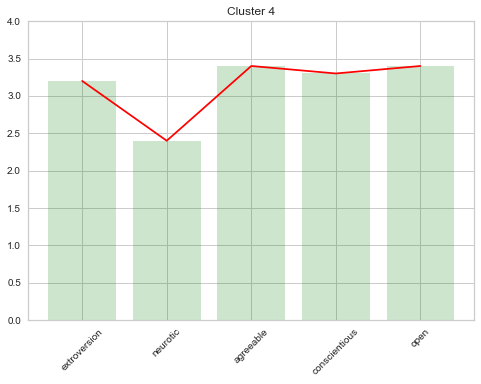

In [25]:
my_sum = my_sums.drop('cluster', axis=1)
plt.bar(my_sum.columns, my_sum.iloc[0,:], color='green', alpha=0.2)
plt.plot(my_sum.columns, my_sum.iloc[0,:], color='red')
plt.title('Cluster 4')
plt.xticks(rotation=45)
plt.ylim(0,4);